In [5]:
import pandas as pd

Customers_df    = pd.read_csv('/content/Customers.csv')
Products_df     = pd.read_csv('/content/Products.csv')
Transactions_df = pd.read_csv('/content/Transactions.csv')

In [6]:
Customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
Products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
Transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [22]:
missing_data_count1 = Customers_df.isna().sum()
print("\n\nMissing Data Count in Customers Dataframe: \n", missing_data_count1)

missing_data_count2 = Products_df.isna().sum()
print("\n\nMissing Data Count in Customers Dataframe: \n", missing_data_count2)

missing_data_count3 = Transactions_df.isna().sum()
print("\n\nMissing Data Count in Customers Dataframe: \n", missing_data_count3)



Missing Data Count in Customers Dataframe: 
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Missing Data Count in Customers Dataframe: 
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Missing Data Count in Customers Dataframe: 
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


No Missing data

In [25]:
Customers_duplicate_rows_count = Customers_df.duplicated().sum()
print(Customers_duplicate_rows_count)

Products_duplicate_rows_count = Products_df.duplicated().sum()
print(Products_duplicate_rows_count)

Transactions_duplicate_rows_count = Transactions_df.duplicated().sum()
print(Transactions_duplicate_rows_count)

0
0
0


No Duplicate rows in Customers_df, Products_df, Transactions_df

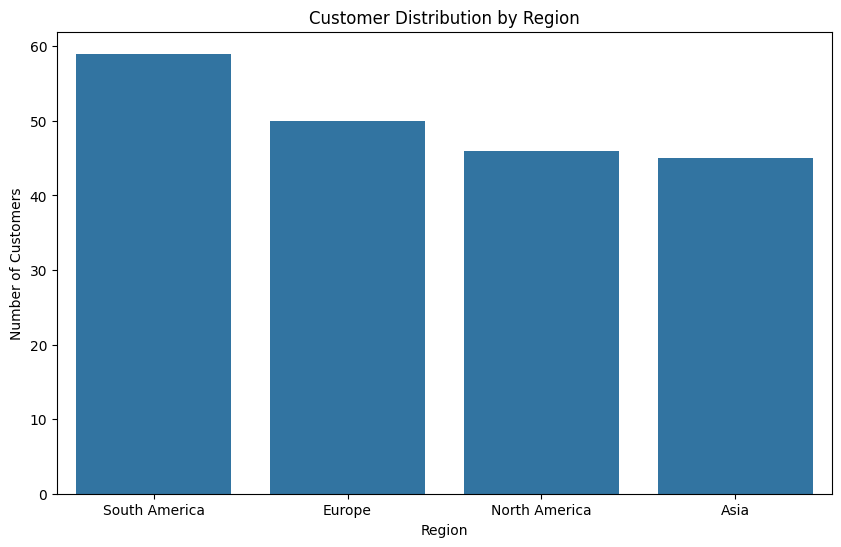

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Customer Distribution by Region
customer_region_counts = Customers_df['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_region_counts.index, y=customer_region_counts.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

## Insight 1:
South America has the highest number of customers.


## Distribution of products by Category & their price range

In [16]:
category_price_summary = Products_df.groupby('Category')['Price'].describe()
category_counts = Products_df['Category'].value_counts()

print("Summary of price ranges by category:")
print(category_price_summary)

print("\
Number of products in each category:")
print(category_counts)

Summary of price ranges by category:
             count        mean         std    min       25%     50%       75%  \
Category                                                                        
Books         26.0  292.212308  153.800135  33.59  154.2975  337.94  419.2125   
Clothing      25.0  263.720000  157.965038  18.82  126.3400  303.50  389.2000   
Electronics   26.0  275.353462  137.056612  16.08  168.8000  282.72  394.3650   
Home Decor    23.0  235.020000  122.236552  41.18  142.3800  235.58  314.9750   

                max  
Category             
Books        497.76  
Clothing     481.78  
Electronics  459.86  
Home Decor   454.53  
Number of products in each category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


## Insight 2:
- `Books` category has the `highest mean price` `$292.21` but also the highest variation

  - We can introduce more mid-range books to capture price-sensitive customers

- `Home Decor` has the `lowest mean price` `$235.02`
  - Opportunity to introduce more premium Home Decor items

## Calculating price gaps within categorices

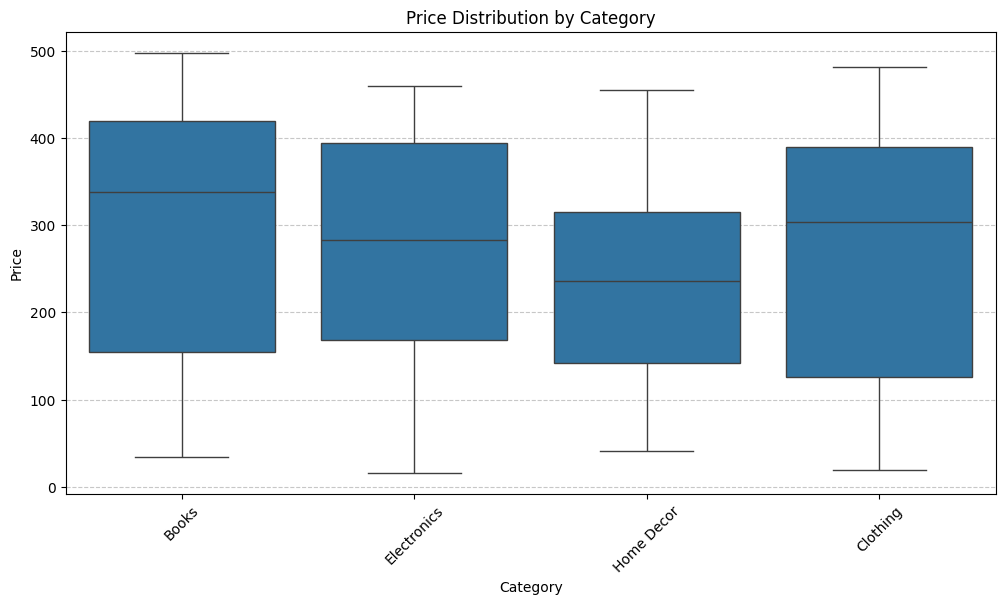

Books - Largest price gap: $108.56
Gap between $169.30 and $277.86
Electronics - Largest price gap: $49.82
Gap between $64.38 and $114.20
Home Decor - Largest price gap: $79.46
Gap between $337.91 and $417.37
Clothing - Largest price gap: $73.12
Gap between $217.05 and $290.17


In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=Products_df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


for category in Products_df['Category'].unique():
    category_prices = sorted(Products_df[Products_df['Category'] == category]['Price'])
    price_gaps = [round(category_prices[i+1] - category_prices[i], 2) for i in range(len(category_prices)-1)]
    max_gap = max(price_gaps)
    gap_index = price_gaps.index(max_gap)
    lower_price = category_prices[gap_index]
    print(f"\
{category} - Largest price gap: ${max_gap:.2f}")
    print(f"Gap between ${lower_price:.2f} and ${category_prices[gap_index+1]:.2f}")

## Insight 3:
- `Books` has the largest price gap of `$108.56`, we can add more mid range books to capture more mid-range customers, thus increasing sales
- Similarly `Home Docor` category has 2nd largest price gap


## Sales Trend over Time

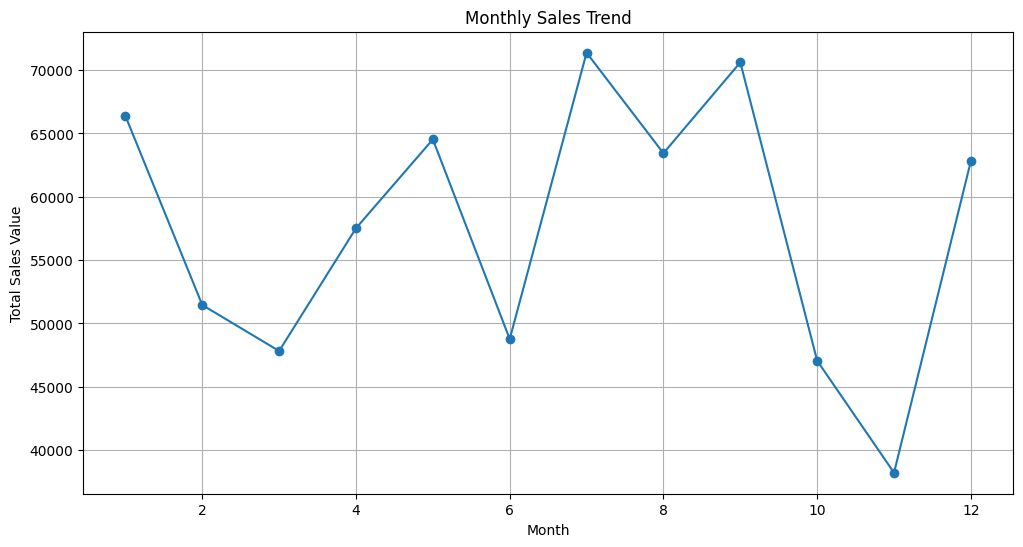

In [26]:
Transactions_df['TransactionDate'] = pd.to_datetime(Transactions_df['TransactionDate'])

plt.figure(figsize=(12, 6))
Transactions_df.groupby(Transactions_df['TransactionDate'].dt.month)['TotalValue'].sum().plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()

## Insight 4:
Significant flucuations in monthly sales (potential seasonality in business), proper inventory planning is required

In [28]:
top_customers = Transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).sort_values('TotalValue', ascending=False).head(10)

print("\
Top 10 Customers by Total Purchase Value:")
print(top_customers)

Top 10 Customers by Total Purchase Value:
            TotalValue  TransactionID
CustomerID                           
C0141         10673.87             10
C0054          8040.39              8
C0065          7663.70             10
C0156          7634.45             11
C0082          7572.91              7
C0188          7111.32              8
C0059          7073.28              8
C0028          6819.57              8
C0099          6715.72              8
C0165          6708.10              9


## Insight 5:
- The top customer (C0141) has spent $10,673.87 across 10 transactions
- There's a significant gap between top customers' spending, suggesting opportunity for middle-tier customer development
- The top 10 customers show consistent transaction counts (7-11 transactions each), indicating loyal customer behavior
